# Visualizing Decision Trees

### Import the dependencies

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Load Iris dataset

In [2]:
iris = load_iris()
test_idx = [0, 24, 49, 75, 90, 99, 105, 125, 149]

### Training data

In [3]:
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

### Testing data

In [4]:
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

### Create and fit our classifier

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict label for new flower

In [6]:
predictions = clf.predict(test_data)
print(predictions)
print()
print(test_target)

[0 0 0 1 1 1 2 2 2]

[0 0 0 1 1 1 2 2 2]


### Visualize the tree

In [7]:
export_graphviz(clf, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

### Write out 3 examples of different classes, to play with a tree

In [8]:
print(iris.feature_names)
print()
print(iris.data[24], iris.target_names[iris.target[24]])
print(iris.data[75], iris.target_names[iris.target[75]])
print(iris.data[125], iris.target_names[iris.target[125]])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

[4.8 3.4 1.9 0.2] setosa
[6.6 3.  4.4 1.4] versicolor
[7.2 3.2 6.  1.8] virginica


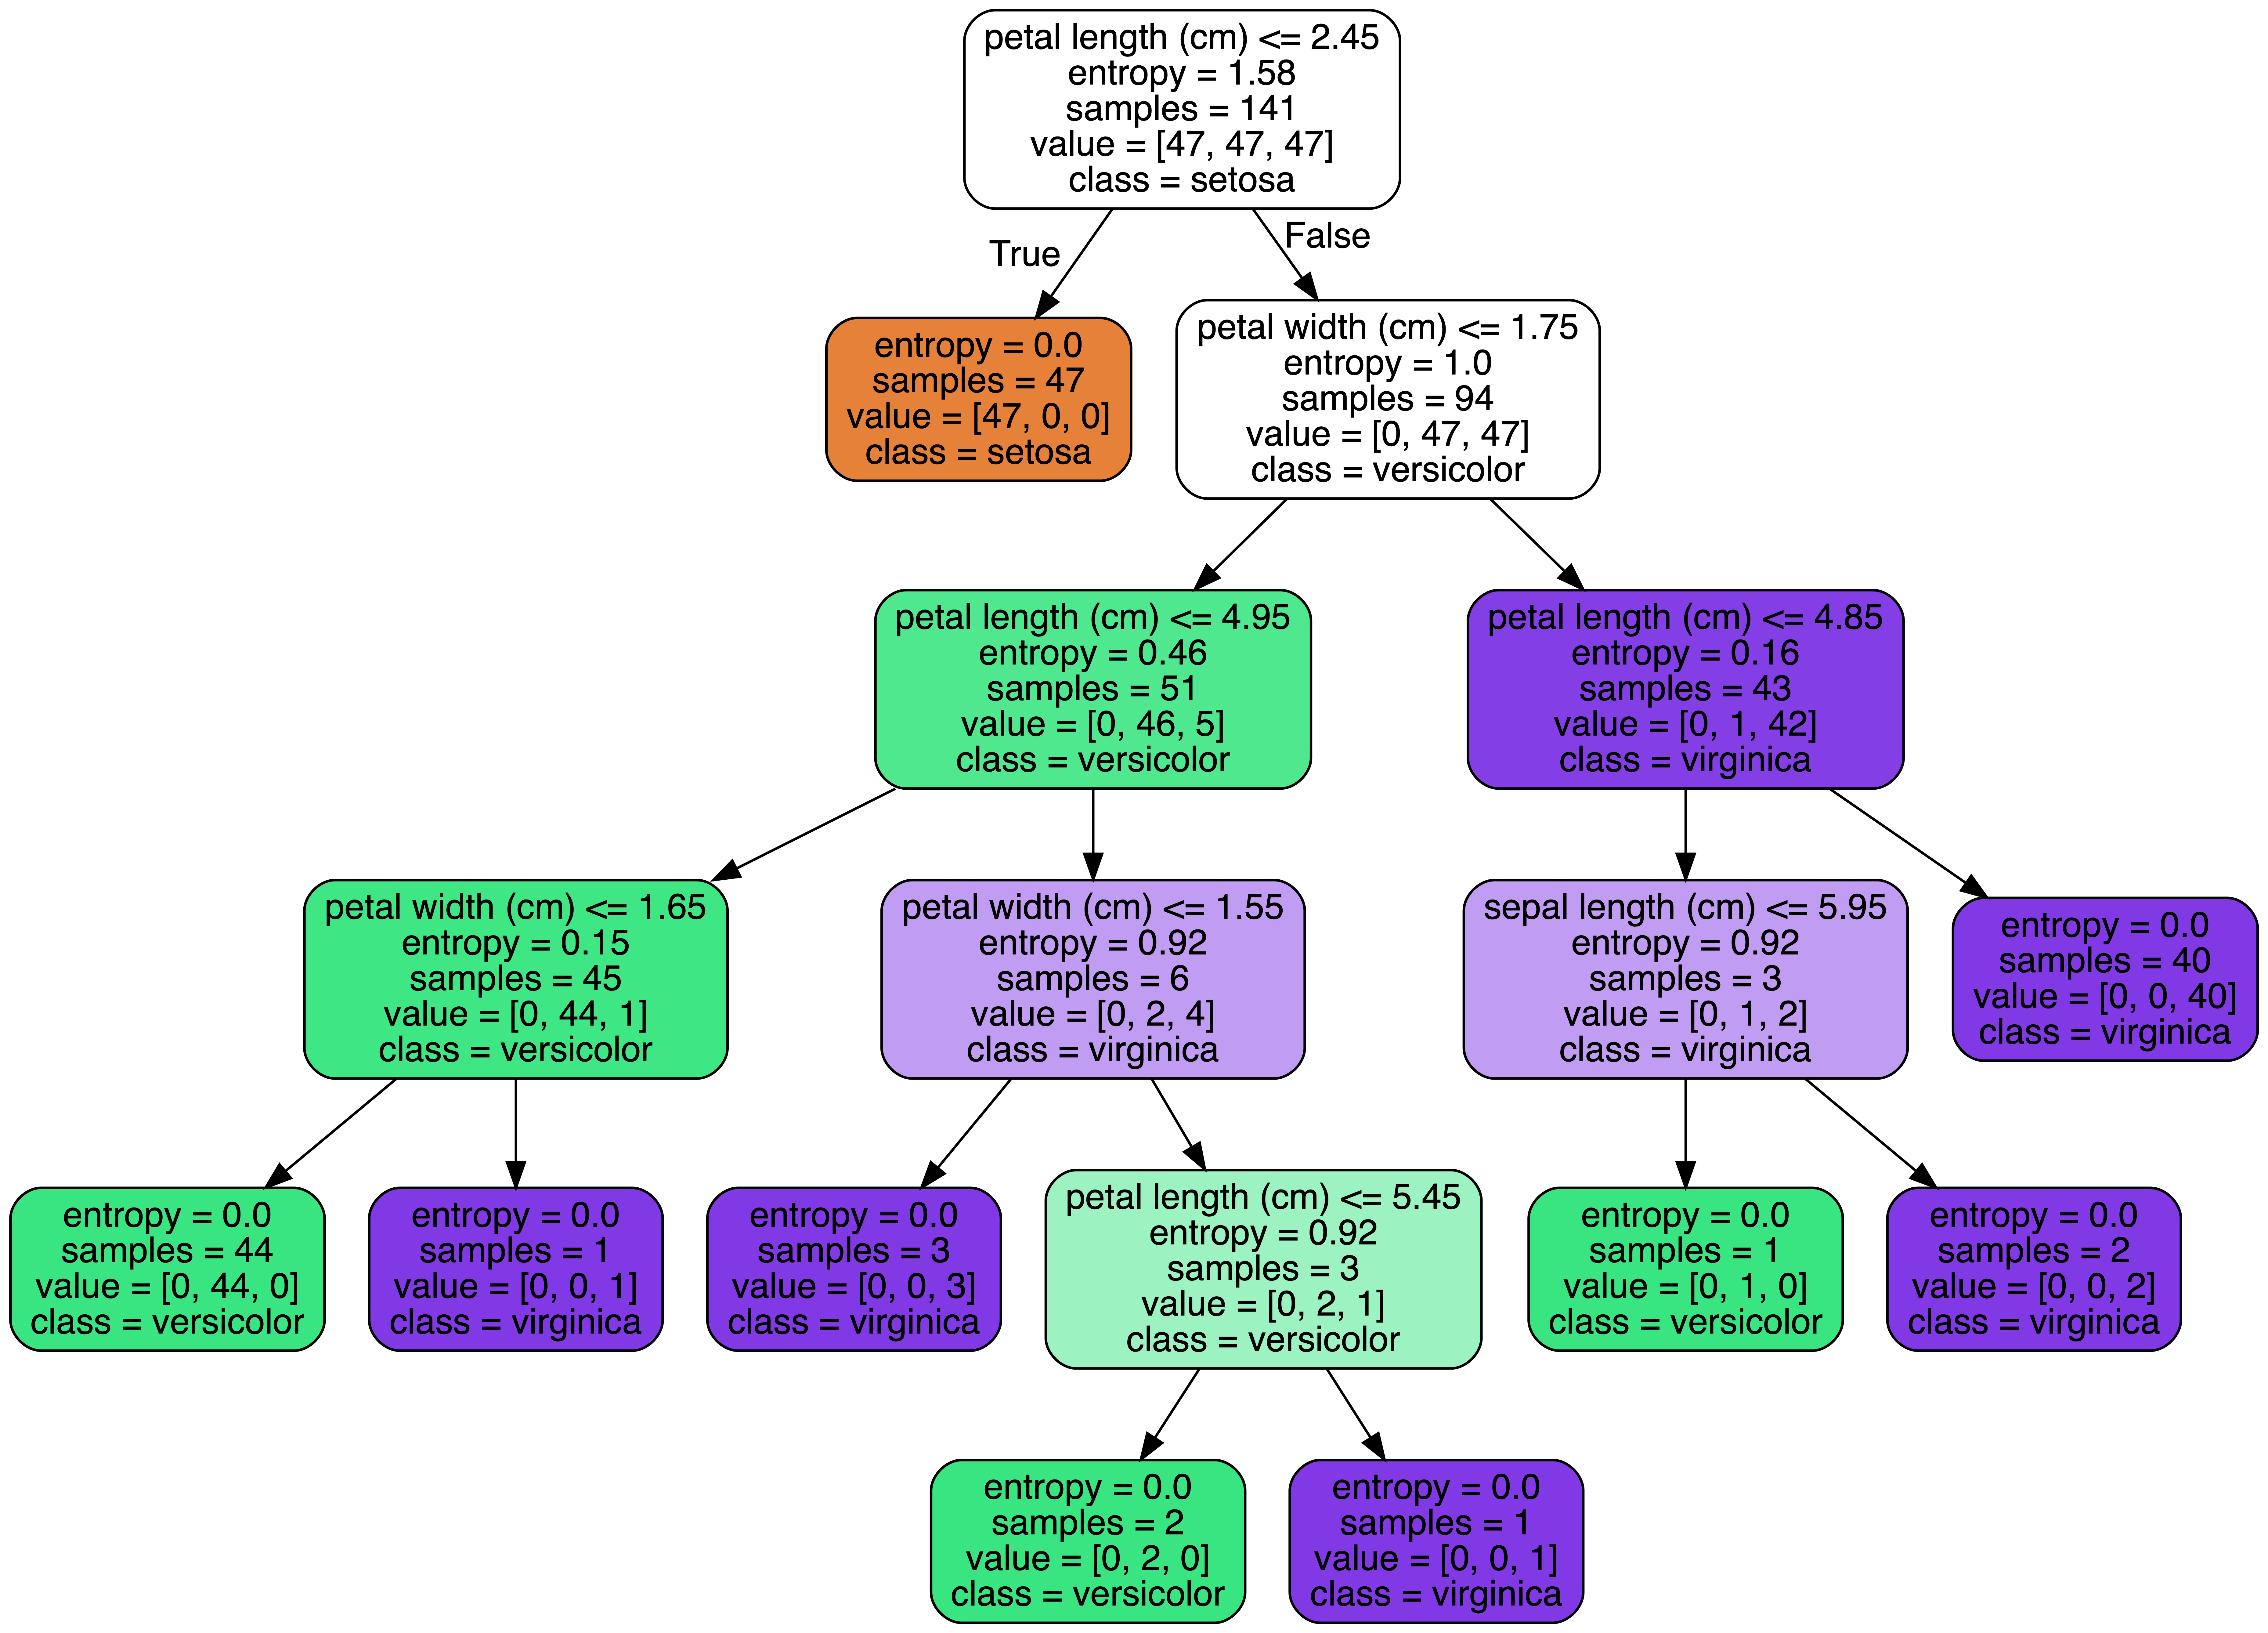

In [9]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')